In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
#1.Ресурс:
#      https://www.kaggle.com/datasets/vivovinco/nba-player-stats

In [3]:
#2a. Предметная область - Сезон НБА 2020/2021, источник - НБА, Характер данных - реальный
#2b. В датасете представленны имена игроков(тип строчный) и их статистика за 36 минут на площадке

In [6]:
df = pd.read_csv('nba2021_per36min.csv')
#Будем исследовать низависимые данные статистики лиги, поэтому уберем их датасета эти данные:

df.pop('Player')#ФИО игрока
df.pop('Pos')#Позиция игрока
df.pop('Tm')#Команда игрока
df.pop('FG')#Количество попаданий игрока в кольцо
df.pop('FGA')#Количество бросков игрока
df.pop('2P')#Количество попаданий игрока в кольцо с ценой попадания 2 очка
df.pop('2PA')#Количество бросков игрока в кольцо с ценой попадания 2 очка
df.pop('3P')#Количество попаданий игрока в кольцо с ценой попадания 3 очка
df.pop('3PA')#Количество бросков игрока в кольцо с ценой попадания 3 очка
df.pop('FT')#Количество попаданий игрока в кольцо со штрафного
df.pop('FTA')#Количество бросков игрока в кольцо со штрафного
df.pop('ORB')#Подборы игрока в атаке
df.pop('DRB')##Подборы игрока в защите
df.pop('MP')#Минуты игрока на площадке

0      408
1       17
2      760
3      873
4      480
      ... 
492    823
493    592
494    901
495    361
496    586
Name: MP, Length: 497, dtype: int64

In [13]:
df
#Age - Возраст игрока
#G - Количество сыгранных игр
#GS - Количество сыгранных игр в стартовой пятерке
#FG% - Количество попаданий от количества бросков 
#3P% - Количество попаданий из-за дуги от количества бросков из-за дуги
#2P% - Количество попаданий двухочкового броска от количества двухочковых бросков
#FT% - Количество попаданий со штрафного от количества бросков со штрафного
#TRB - Полное количество выигранных подборов
#AST - Количество ассистов
#STL - Количество удачных перехватов мяча
#BLK - Количество заблокированных бросков
#TOV - Количество потерь
#PF - Нарушения правил
#PTS - Количество очков за матч

,Age,G,GS,FG%,3P%,2P%,FT%,TRB,AST,STL,BLK,TOV,PF,PTS
0,21,28,2,0.590,0.000,0.590,0.561,9.9,1.5,1.1,1.3,2.6,4.8,16.0
1,24,6,0,0.125,0.000,0.167,0.000,6.4,4.2,0.0,0.0,0.0,2.1,4.2
2,27,27,27,0.603,0.000,0.606,0.468,11.3,2.7,1.2,0.7,2.2,2.4,10.3
3,23,26,26,0.573,0.400,0.576,0.841,9.9,5.7,1.0,1.1,3.2,2.8,21.4
4,35,18,18,0.476,0.358,0.525,0.762,5.9,2.6,0.5,1.2,1.2,2.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,28,28,23,0.456,0.353,0.500,0.785,5.7,6.0,1.7,0.7,1.5,1.3,12.9
493,32,23,0,0.587,0.238,0.628,0.500,8.1,6.1,1.9,0.7,2.9,4.1,15.7
494,22,26,26,0.429,0.369,0.462,0.887,4.0,9.6,0.8,0.3,4.4,2.1,27.5
495,28,15,12,0.525,0.188,0.577,0.759,12.0,3.7,1.0,0.9,1.4,3.7,15.1


In [14]:
#3a. Среднее значение, ско

Mean_Std = ['Среднее', 'СКО']
Column = []
tabl = {}

for i in range(len(df.columns)):
    Column.append(df.columns[i])
    if Column[i] not in tabl:
        tabl[Column[i]] = [0]*2

for j in tabl:
    tabl[j][0] = round(df[j].mean(),2)
    tabl[j][1] = round(df[j].std(),2)

new_df = pd.DataFrame(tabl, index = Mean_Std)
new_df

Text(0.5, 1.0, 'Age distribution')

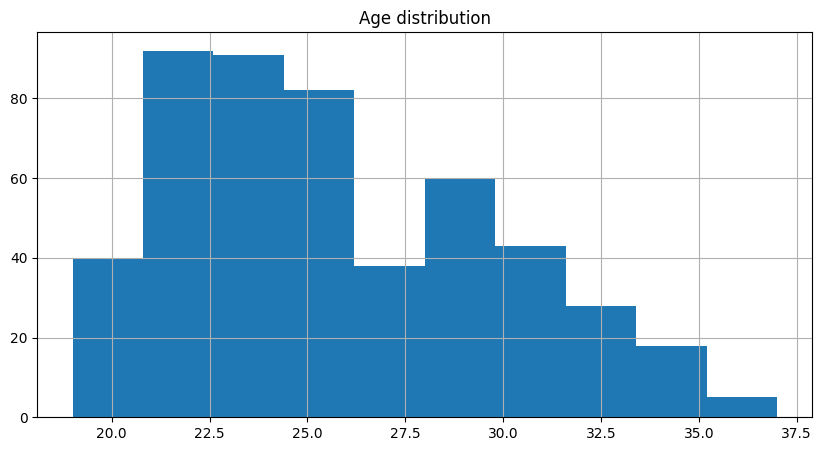

In [16]:
#3b. Построить гистограмму распределения значений, определить есть ли выбросы 
plt.figure(figsize=(10,5))
plt.hist(df['Age'],bins=10)
plt.grid(True)
plt.title('Age distribution')

In [ ]:
#3с. В выборке пропущенных значений - нет
#3d. Так как мы рассматриваем статистику игрока, то пропущенные значения стоит считать как нулевые

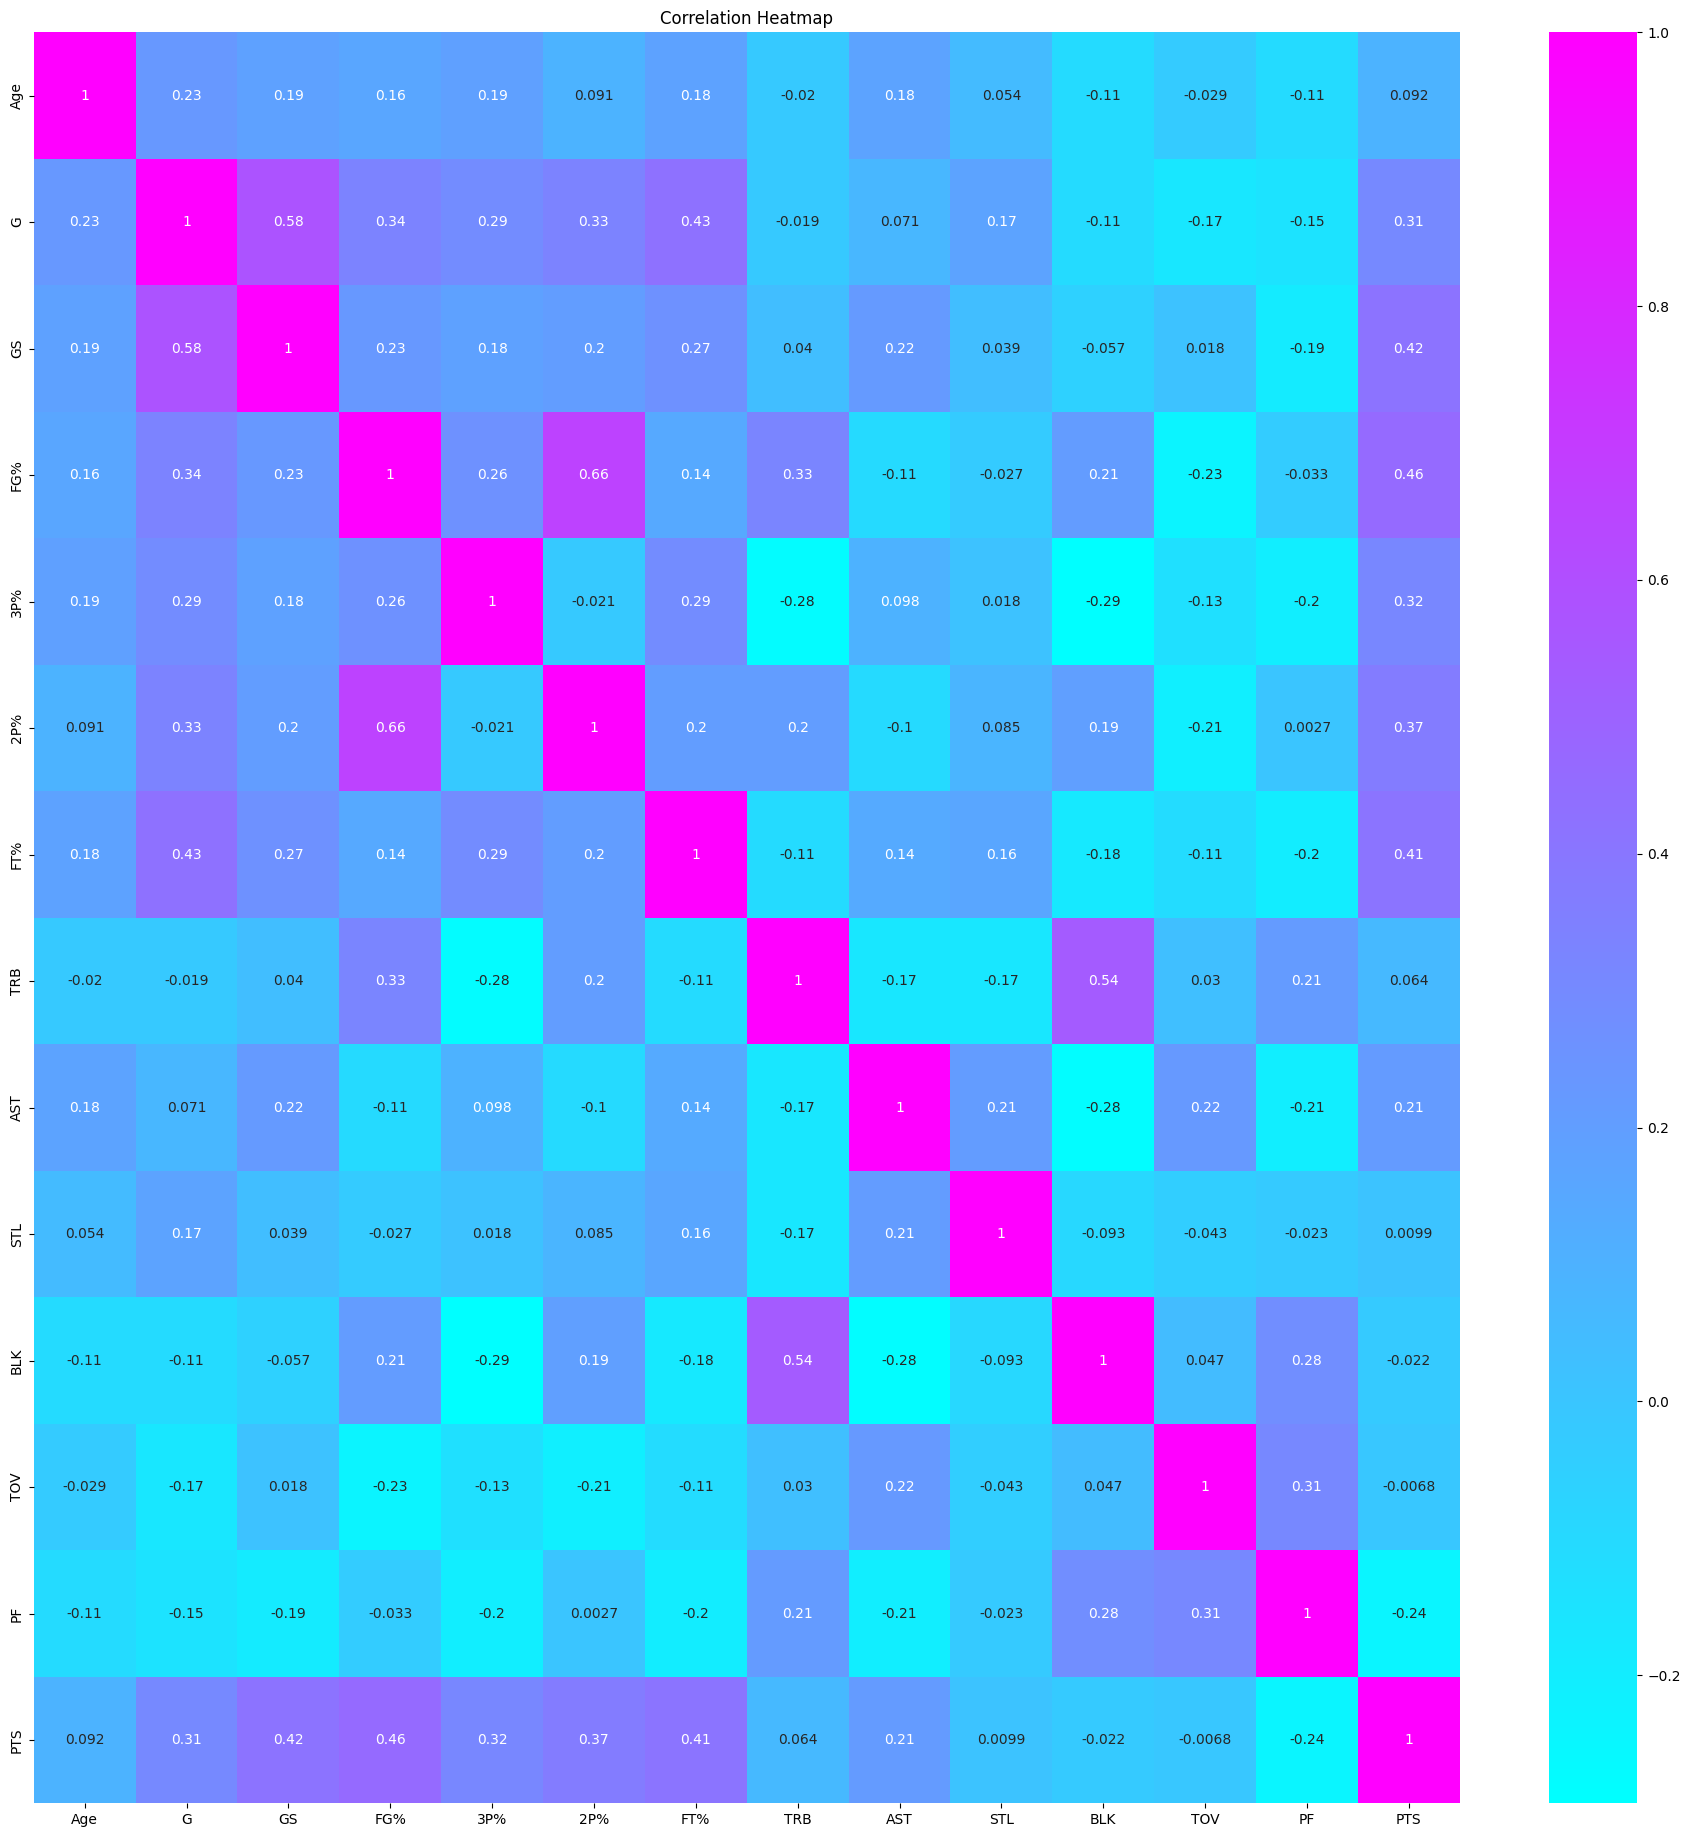

In [17]:
#4.Определить корреляцию между параметрами
corr_matrix = df.corr()
plt.figure(figsize=(23,23))
sns.heatmap(corr_matrix, annot=True, cmap='cool')
plt.title('Correlation Heatmap')
plt.show()

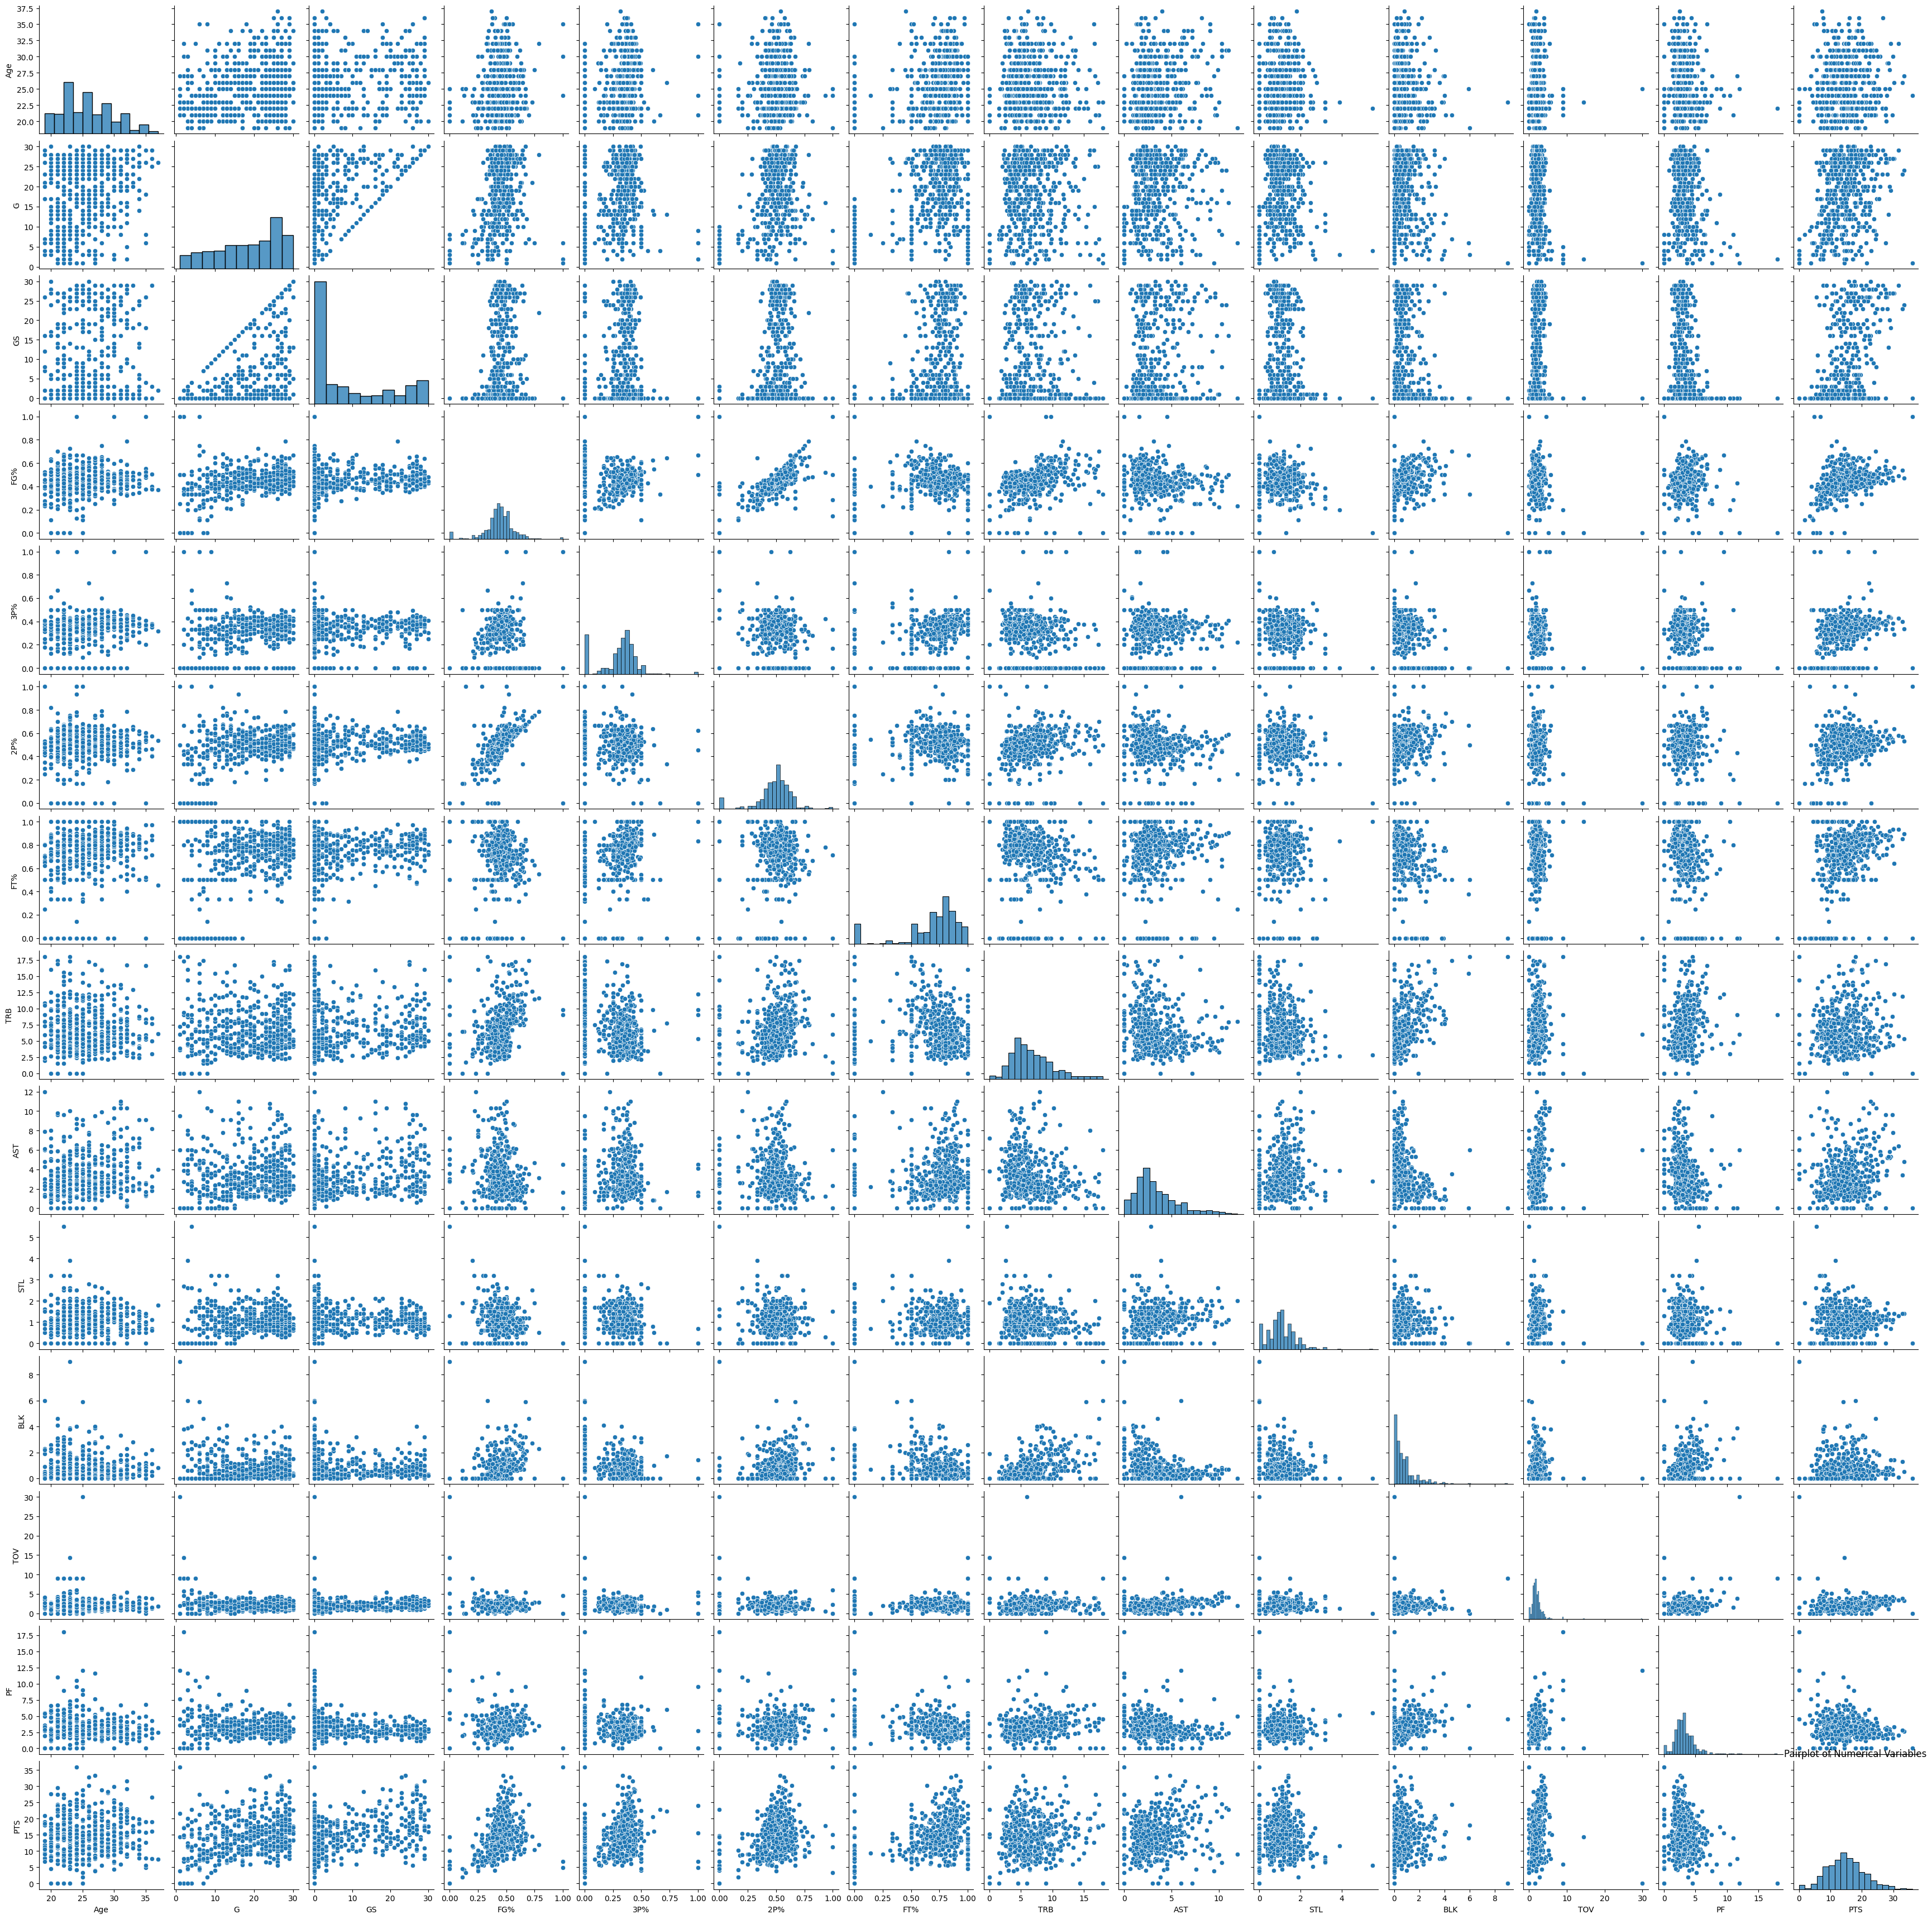

In [18]:
sns.pairplot(df)
plt.title('Pairplot of Numerical Variables')
plt.show()

In [ ]:
#4a. какие атрибуты высококоррелированы, определить характер корреляции  
#Высококоррелированы атрибуты - это атрибуты, корреляция, которых стремится к единице. На графике
#высокая корреляция отображается в виде прямой с положительным коэффицентом наклона.

#4b. какие атрибуты не имеют корреляцию
#Атрибуты, корреляция которых равна нулю. На графике это выглядит как неравномерное распределение данных.

#4d. Вывод:
#Если атрибуты не коррелированы, то на графиках корреляции данные распределены неравномерно.
#Если атрибуты высококоррелированы, то на графике это будет выглядить как прямая с положительным 
#коэффом наклона. Можно сказать, что у данных характер связи прямой.
#Также стоит рассмотреть случай когда коэфф корреляции стремится к минус единице,
#на графике это будет выглядить как прямая с отрицательным  
#коэффом наклона. Можно сказать, что у данных характер связи обратный.
